# Absolute vs. Relative Frequency

By default, **seaborn's countplot** function will summarize and plot the data in terms of **absolute frequency**, or pure counts. In certain cases, you might want to understand the distribution of data or want to compare levels in terms of **proportions of the whole**. In this case, you will want to plot the data in terms of **relative frequency**, where the height indicates the proportion of data taking each level, rather than the absolute count.

One method of plotting the data in terms of **relative frequency** on a bar chart is to just relabel the counts axis in terms of proportions. The underlying data will be the same, it will simply be the scale of the axis ticks that will be changed.

In [123]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [124]:
df=pd.read_csv('../Code/pokemon.csv')
df.rename(columns={'#':'id'},inplace=True)
df.head()

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Each Pokémon species has one or two 'types' that play a part in its offensive and defensive capabilities. How frequent is each type? The code below creates a new dataframe that puts all of the type counts in a single column.

In [115]:
pokemon_types=df.melt(id_vars=['id', 'Name'],value_vars=['Type 1','Type 2'],var_name='type_level',value_name='type').dropna()

In [116]:
pokemon_types.head(10)

,id,Name,type_level,type
0,1,Bulbasaur,Type 1,Grass
1,2,Ivysaur,Type 1,Grass
2,3,Venusaur,Type 1,Grass
3,3,VenusaurMega Venusaur,Type 1,Grass
4,4,Charmander,Type 1,Fire
5,5,Charmeleon,Type 1,Fire
6,6,Charizard,Type 1,Fire
7,6,CharizardMega Charizard X,Type 1,Fire
8,6,CharizardMega Charizard Y,Type 1,Fire
9,7,Squirtle,Type 1,Water


In [117]:
type_counts=pokemon_types['type'].value_counts()
type_order=type_counts.index

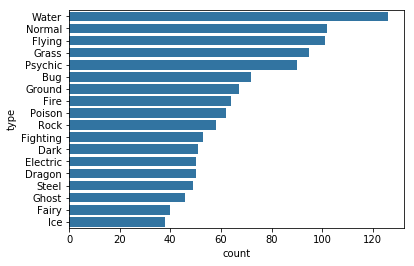

In [118]:
sb.countplot(data=pokemon_types,y='type',color=sb.color_palette()[0],order=type_order)

The xticks and yticks functions aren't only about rotating the tick labels. You can also get and set their locations and labels as well. The first argument takes the tick locations: in this case, the tick proportions multiplied back to be on the scale of counts. The second argument takes the tick names: in this case, the tick proportions formatted as strings to two decimal places.

            plt.xticks(tick_props*n_pokemon,tick_name);


You can add a ylabel call to make it clear that we're no longer working with straight counts.

            plt.yticks(tick_props * n_points, tick_names)

In [119]:
n_pokemon=df.shape[0]
max_type_count=type_counts[0]
max_prop=max_type_count/n_pokemon
print(max_prop)

0.1575


In [120]:
tick_props=np.arange(0,max_prop,0.03)
tick_name=['{:0.3f}'.format(v) for v in tick_props]

Text(0.5,0,'Proportion')

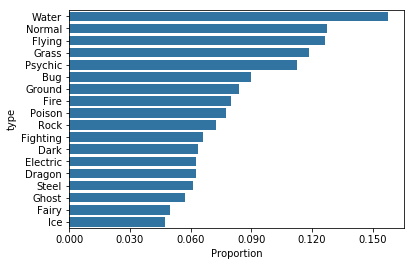

In [121]:
sb.countplot(data=pokemon_types,y='type',color=sb.color_palette()[0],order=type_order)
plt.xticks(tick_props*n_pokemon,tick_name);
plt.xlabel('Proportion')

## Additional Variation

Rather than plotting the data on a relative frequency scale, you might use text annotations to label the frequencies on bars instead. This requires writing a loop over the tick locations and labels and adding one text element for each bar.

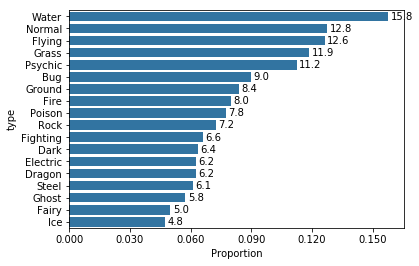

In [122]:
sb.countplot(data=pokemon_types,y='type',color=sb.color_palette()[0],order=type_order)
plt.xticks(tick_props*n_pokemon,tick_name);
plt.xlabel('Proportion')
for i in range(type_counts.shape[0]):
    count=type_counts[i]                                  
    pct_string='{:.1f}'.format(100*count/n_pokemon)
    plt.text(count+1,i,pct_string,va='center');

I use the pct_string to generate the category name, so I can get the count of each category level. At the end, I use the text function to print each percentage, with the x-position, y-position, and string as the three main parameters to the function.

(Documentation: [Text objects](https://matplotlib.org/api/text_api.html?highlight=get_text#matplotlib.text.Text))